# Data Cleaning
In this stage, you will read in the raw data and perform any necessary reshaping, combining, and cleaning of the data. Though this stage is not explicitly an exploratory stage, you will learn a lot about the content of the data throughout the course of this notebook.

### Imports

For your convenience, we have included a few pre-written functions, which you might find useful in your analysis. They are by no means necessary, but feel free to use any or all of them. The code for these functions can be found in /src

In [1]:
import pandas as pd
import os
import sys
import numpy as np

In [2]:
src_path = os.path.abspath('../src/')
sys.path.append(src_path)

from data_cleaning import standardize_col_names, null_counts

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_seq_items', None)

The Data Cleaning functions in the src file are:

- standardize_col_names(df)

Standardizes column names of a dataframe. It will remove white space, replace spaces with underscores, and eliminate special characters (including parenthesis and slashes). All letters are converted to lowercase.

Returns a copy of the dataframe.

- null_counts(df)

Returns a dataframe containing the number of null values in each column of a given dataframe.

### Data
Read in the data and take an initial look.

In [4]:
input_loc = '../data/raw/'

In [5]:
train_transaction = pd.read_csv(input_loc + 'train_transaction.csv', low_memory=False)
train_identity = pd.read_csv(input_loc + 'train_identity.csv', low_memory=False)

In [6]:
train_transaction.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'v5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'v12', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'v42', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77',
    

In [7]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,v5,V6,V7,V8,V9,V10,V11,v12,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,v42,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,v139,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,v157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,v298,V299,V300,V301,v301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,v323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,V340
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0

In [8]:
train_identity.head()

,TransactionID,variable,value
0,2987004,id_01,0.0
1,2987008,id_01,-5.0
2,2987010,id_01,-5.0
3,2987011,id_01,-5.0
4,2987016,id_01,0.0


## Describing the Data
Before diving into the data, let's consider a few practical issues, which may or may not be important, depending on your dataset.

### Data Shape
Take a look at the current shape of the data set or sets. Is it in a convenient form to perform some exploratory analysis on? If not, what will you need to change before analysis can happen?

In [6]:
print ("Train Transaction Shape:", train_transaction.shape)
print ("Train Identity Shape:", train_identity.shape)

Train Transaction Shape: (590540, 403)
Train Identity Shape: (5769320, 3)


**Answer:** Pivot 'train_identity' to that each 'TransactionID' has a single row with multiple columns representing each variable; once we have both dataframes in a compatible wide format, merge using 'TransactionID'.

In [6]:
train_identity_sorted = train_identity.sort_values(by="TransactionID", ascending=True)
train_identity_sorted.head()

,TransactionID,variable,value
0,2987004,id_01,0.0
1442330,2987004,id_11,100.0
4615456,2987004,id_33,2220x1080
1298097,2987004,id_10,NaN
4759689,2987004,id_34,match_status:2


In [7]:
train_identity_pivoted = train_identity_sorted.pivot(index='TransactionID', columns='variable', values='value')
train_identity_pivoted.shape

(144233, 40)

In [10]:
train_identity_pivoted.head()

variable,DeviceInfo,DeviceType,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,...,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987004,SAMSUNG SM-G892A Build/NRD90M,mobile,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T
2987008,iOS Device,mobile,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,...,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T
2987010,Windows,desktop,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,...,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T
2987011,NaN,desktop,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,...,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T
2987016,MacOS,desktop,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,...,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T


### Data Type
Which data types does each variable contain? Are variables continuous or categorical?

In [12]:
print (train_transaction.dtypes)

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
card2             float64
card3             float64
card4              object
card5             float64
card6              object
addr1             float64
addr2             float64
dist1             float64
dist2             float64
P_emaildomain      object
R_emaildomain      object
C1                float64
C2                float64
C3                float64
C4                float64
C5                float64
C6                float64
C7                float64
C8                float64
C9                float64
C10               float64
C11               float64
C12               float64
C13               float64
C14               float64
D1                float64
D2                float64
D3                float64
D4                float64
D5                float64
D6                float64
D7                float64
D8          

In [13]:
print (train_identity_pivoted.dtypes)

variable
DeviceInfo    object
DeviceType    object
id_01         object
id_02         object
id_03         object
id_04         object
id_05         object
id_06         object
id_07         object
id_08         object
id_09         object
id_10         object
id_11         object
id_12         object
id_13         object
id_14         object
id_15         object
id_16         object
id_17         object
id_18         object
id_19         object
id_20         object
id_21         object
id_22         object
id_23         object
id_24         object
id_25         object
id_26         object
id_27         object
id_28         object
id_29         object
id_30         object
id_31         object
id_32         object
id_33         object
id_34         object
id_35         object
id_36         object
id_37         object
id_38         object
dtype: object


### Data Amount
How much data does the set contain? (ie, how many variables, how many records, how many files?) If the data set is very large, this may effect the tools you can use later (or else how much features selection will need to take place).

In [30]:
data_files = [f for f in os.listdir(input_loc) if f.endswith('.csv')]
data_summary = {}
for file_name in data_files:
    file_path = os.path.join(input_loc, file_name)
    df = pd.read_csv(file_path)
    data_summary[file_name]={
        'num_records': df.shape[0],
        'num_variables':df.shape[1]
    }

total_files = len(data_files)
total_records = sum(info['num_records'] for info in data_summary.values())
total_variables = sum(info['num_variables'] for info in data_summary.values()) / total_files

print (f"Total number of files:{total_files}")
print(f"Total number of records: {total_records}")
print(f"Average number of variables per file: {total_variables}")

for file, details in data_summary.items():
    print(f"{file}: Records={details['num_records']}, Variables={details['num_variables']}")



C:\Users\Yiyi.Luo\AppData\Local\Temp\ipykernel_2424\4275667445.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Yiyi.Luo\AppData\Local\Temp\ipykernel_2424\4275667445.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Total number of files:5
Total number of records: 13049522
Average number of variables per file: 162.6
sample_submission.csv: Records=506691, Variables=2
test_identity.csv: Records=5676280, Variables=3
test_transaction.csv: Records=506691, Variables=402
train_identity.csv: Records=5769320, Variables=3
train_transaction.csv: Records=590540, Variables=403


In [33]:
def check_mixed_types(series):
    types = set(series.map(type))
    return len(types) > 1

mixed_type_columns = {column: df[column].map(type).unique() for column in df.columns if check_mixed_types(df[column])}
print("Columns with mixed types:")
for column, types in mixed_type_columns.items():
    print(f"{column}: {types}")

Columns with mixed types:
card4: [<class 'str'> <class 'float'>]
card6: [<class 'str'> <class 'float'>]
P_emaildomain: [<class 'float'> <class 'str'>]
R_emaildomain: [<class 'float'> <class 'str'>]
M1: [<class 'str'> <class 'float'>]
M2: [<class 'str'> <class 'float'>]
M3: [<class 'str'> <class 'float'>]
M4: [<class 'str'> <class 'float'>]
M5: [<class 'str'> <class 'float'>]
M6: [<class 'str'> <class 'float'>]
M7: [<class 'float'> <class 'str'>]
M8: [<class 'float'> <class 'str'>]
M9: [<class 'float'> <class 'str'>]


In [35]:
unique_values_count = df.nunique()
unique_values_count

TransactionID     590540
isFraud                2
TransactionDT     573349
TransactionAmt     20902
ProductCD              5
card1              13553
card2                500
card3                114
card4                  4
card5                119
card6                  4
addr1                332
addr2                 74
dist1               2651
dist2               1751
P_emaildomain         59
R_emaildomain         60
C1                  1657
C2                  1216
C3                    27
C4                  1260
C5                   319
C6                  1328
C7                  1103
C8                  1253
C9                   205
C10                 1231
C11                 1476
C12                 1199
C13                 1597
C14                 1108
D1                   641
D2                   641
D3                   649
D4                   808
D5                   688
D6                   829
D7                   597
D8                 12353
D9                    24


## Cleaning

Before you can dive into exploratory analysis, it's likely that you will have to do some reshaping of the data. Depending on what your data set looks like, there may be a lot or very little work to do here.


1. Transaction ID: DROP?
2. TransactionDT: MAYBE: It does not make sense in this format, but it could be delta from a given reference datetime; we might be able to use it in models to capture cyclical patterns; see if we can convert this delta inro more meaningful features like hour of the day?
3. isFraud: KEEP;
4. Transaction Amount: KEEP;
5. ProductCD: KEEP; 
6. Card1: MAYBE: Likely a pseudonymized card identifier, could be treated as a categorical variable?
7. card2: MAYBE: Looks like CVV, but could also be another bank or card identifier; treat it as categorical variable (?);
8. card3 AND card5: KEEP: Could be a country code or bank code in transaction data; encode it and see if transactions with unusual values are more likely to be fraudulent;
9. card4: KEEP;
11. card6: KEEP; do we want to combine it with card4 and create new categories?
12. addr1 and addr2: KEEP; could be billing region, zip code, country code, keep them as geographic information and group into regions if too many unique values; 
13. dist1 and dist2: KEEP; Could represent some form of distance measure (between the buyer and seller?)
14. P_emaildo and R_emaildo: DROP; (I'm not sure)

### Combine and/or Reshape
Be careful not to lose any data while reshaping. Make sure you have the same number of variables and observations in the raw set as you do after reshaping. Keep in mind that, for analysis and machine learning, you will want to have one or more dataframes with each column representing a measured variable and each row representing an observation.

In [17]:
combined_df = pd.merge(train_transaction, train_identity_pivoted, on='TransactionID', how='left')

In [18]:
combined_df.shape

(590540, 443)

In [10]:
combined_df.head(20)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,v5,V6,V7,V8,V9,V10,V11,v12,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,v42,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,v139,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,v157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,v298,V299,V300,V301,v301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,v323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,V340,DeviceInfo,DeviceType,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [12]:
fraud_distribution = combined_df['isFraud'].value_counts(normalize=True) * 100
print("Distribution of the 'isFraud' column:")
print(fraud_distribution)

Distribution of the 'isFraud' column:
isFraud
0    96.500999
1     3.499001
Name: proportion, dtype: float64


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

**1. isFraud with TransactionAmt (Boxplot)**

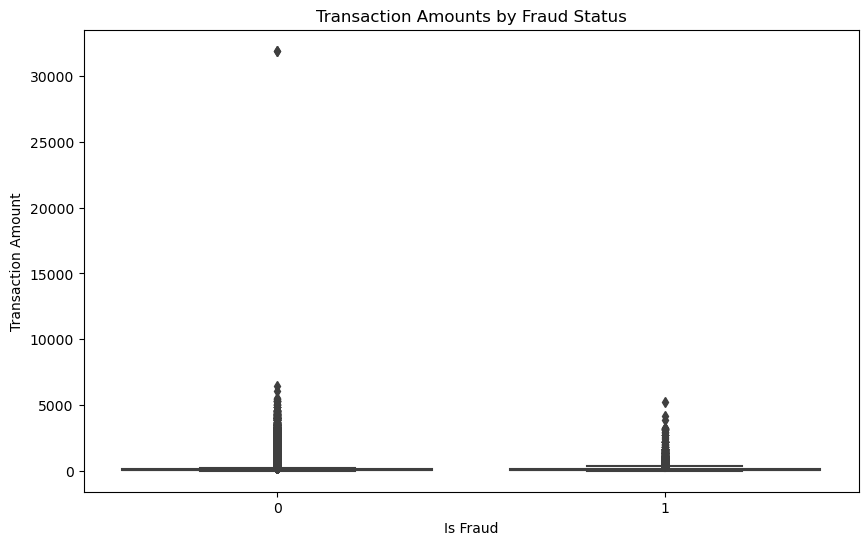

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='isFraud', y='TransactionAmt', data=combined_df)
plt.title('Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()

**2. isFraud with ProductCD (Count Plot)**

In [17]:
combined_df['ProductCD'] = combined_df['ProductCD'].astype(str)
combined_df['isFraud'] = combined_df['isFraud'].astype(str)

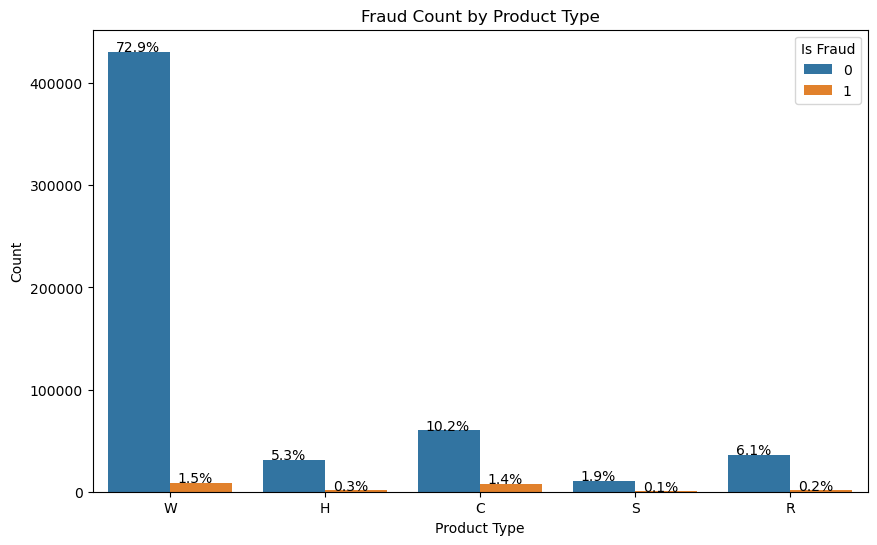

In [20]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='ProductCD', hue='isFraud', data = combined_df)
plt.title('Fraud Count by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.legend(title='Is Fraud')

total = len(combined_df)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.15
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x,y), size = 10)

plt.show()

In [22]:
fraud_cases = combined_df[combined_df['isFraud'] == '1']
product_cd_distribution_fraud = fraud_cases['ProductCD'].value_counts(normalize=True) * 100
print("Percentage distribution of ProductCD among fraud cases:")
print(product_cd_distribution_fraud)

Percentage distribution of ProductCD among fraud cases:
ProductCD
W    43.406088
C    38.755263
H     7.617481
R     6.901224
S     3.319944
Name: proportion, dtype: float64


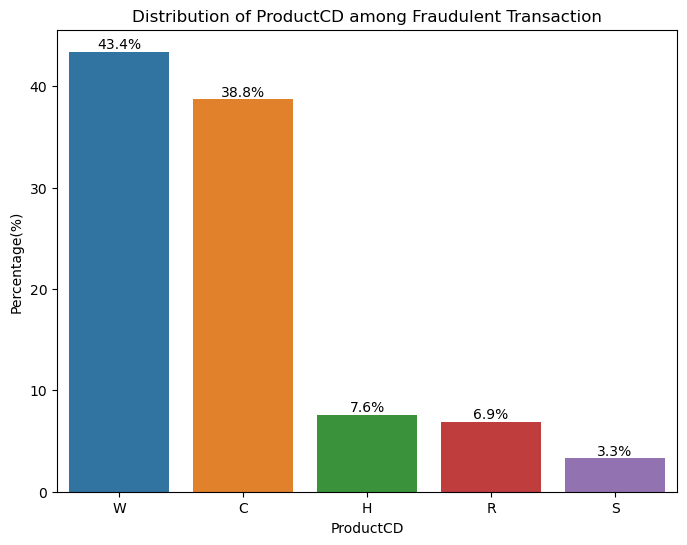

In [25]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=product_cd_distribution_fraud.index, y=product_cd_distribution_fraud.values)
plt.title('Distribution of ProductCD among Fraudulent Transaction')
plt.xlabel('ProductCD')
plt.ylabel('Percentage(%)')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0,5), textcoords='offset points')
plt.show()

**3. isFraud with card4 (Bar Plot)**

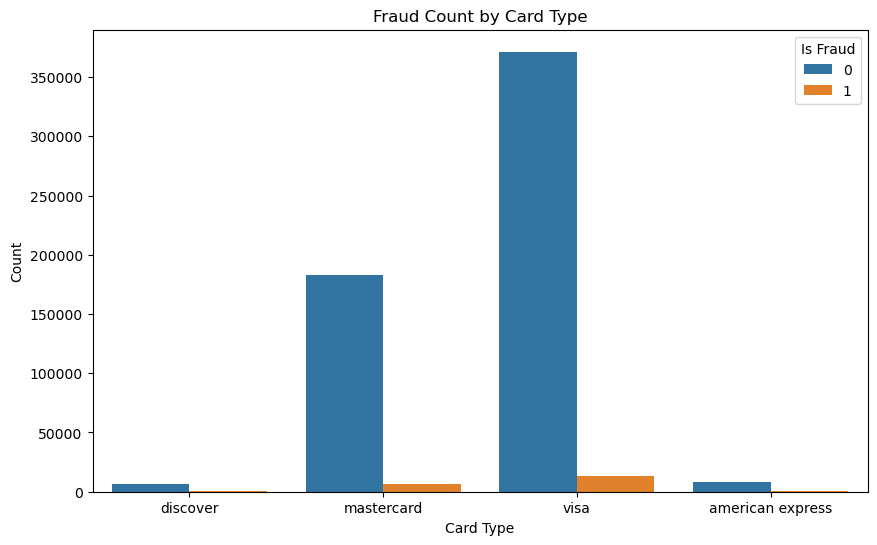

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x='card4', hue='isFraud', data=combined_df)
plt.title('Fraud Count by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

**4. isFraud with card6 (Bar Plot)**

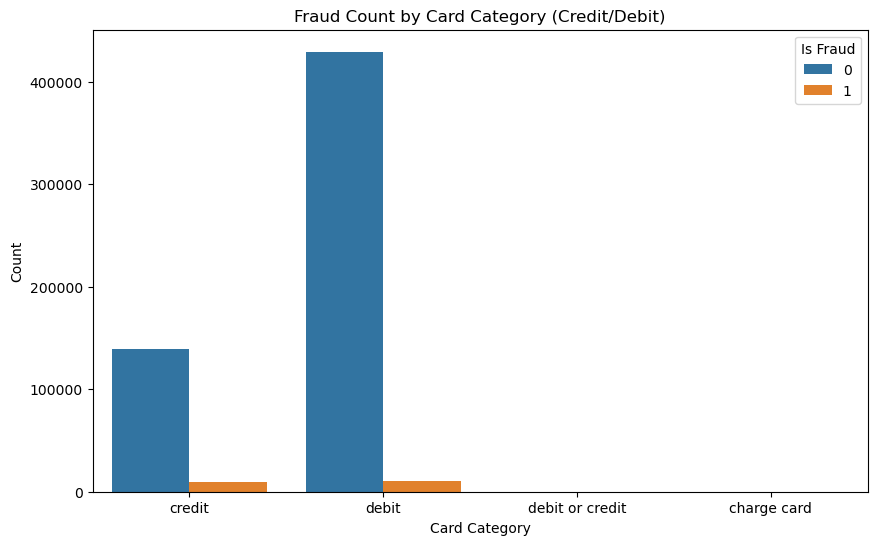

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x='card6', hue='isFraud', data=combined_df)
plt.title('Fraud Count by Card Category (Credit/Debit)')
plt.xlabel('Card Category')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

### Indexing
Which variable or variables should you index on? Depending on your dataset, this may or may not have a simple answer. Regardless, choose one or more index values for your data set.

Since likely I will often need to filter/sort by 'TransactionID' and 'ProductCD', I will choose these two as a composite index of the columns.

In [18]:
combined_df.set_index(['TransactionID', 'ProductCD'], inplace=True)

In [19]:
combined_df.head(10)

,,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,v5,V6,V7,V8,V9,V10,V11,v12,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,v42,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,v139,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,v157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,v298,V299,V300,V301,v301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,v323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,V340,DeviceInfo,DeviceType,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
TransactionID,ProductCD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,W,0,86400,68.5,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0

### Variable Names
Depending on your data set, variables may have names with strange symbols, which can making loading, saving, and subsetting data difficult. If applicable, you should deal with this now.

In [41]:
print(combined_df.columns)

Index(['isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'v5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'v12', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'v42', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81',
      

### Duplicates
Deal with any duplicate rows/columns (or, contrarily, any empty rows/columns), if applicable.

In [12]:
def get_duplicated_columns(combined_df):
    duplicated_columns = {}
    for i in range(combined_df.shape[1]):
        col1 = combined_df.iloc[:, i]
        for j in range(i + 1, combined_df.shape[1]):
            col2 = combined_df.iloc[:, j]
            if col1.equals(col2):
                col1_name = combined_df.columns[i]
                col2_name = combined_df.columns[j]
                if col1_name not in duplicated_columns and col2_name not in duplicated_columns:
                    duplicated_columns[col1_name] = col2_name
    return duplicated_columns

dups = get_duplicated_columns(combined_df)

print("Duplicated Columns:")
for key, value in dups.items():
    print(f"{key} is duplicated with {value}")

Duplicated Columns:
V5 is duplicated with v5
v12 is duplicated with V12
v42 is duplicated with V42
v139 is duplicated with V139
V157 is duplicated with v157
V298 is duplicated with v298
V301 is duplicated with v301
V323 is duplicated with v323


In [19]:
combined_df = combined_df.drop(columns=dups)
combined_df.shape

(590540, 435)

In [13]:
duplicate_rows = combined_df.duplicated()
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")
if num_duplicates > 0:
    print("Duplicate rows:")
    print(combined_df[duplicates])

Number of duplicate rows: 0


### Categorical Encoding
Are there any categorical variables in your data? If so, how would you deal with this so that it can be handled by a machine learning algorithm? You're free to implement the solution now or during your model training process, whichever suits you better.

**Answer:** 
1. ProductCD (W,H,C,R,S);
2. card4 (discover, mastercard, visa);
3. card6 (credit, debit);
4. P/R emaildomain (gmail.com, outlook.com, yahoo.com);
5. M1-M9 (T,F);
6. id_12 (NotFound);
7. id_15, id_28 (New, Found);
8. id_16, id_29 (NotFound);
9. id_30 (Android, iOS);
10. id_31 (samsung browser; mobile safari 11.0);
11. id_33 (2220x1080);
12. id_34 (match_status:2, match_status:1)
13. id_34 - id_38 (T, F);

In [42]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 590540 entries, (2987000, 'W') to (3577539, 'W')
Columns: 441 entries, isFraud to id_38
dtypes: float64(385), int64(3), object(53)
memory usage: 2.0+ GB
None


In [47]:
categorical_columns = [col for col in combined_df.columns if combined_df[col].dtype == 'object' or combined_df[col].nunique() < 10]
print("Categorical columns and number of unique values:")
for col in categorical_columns:
    print(f"{col}: {combined_df[col].nunique()} unique values")

Categorical columns and number of unique values:
isFraud: 2 unique values
card4: 4 unique values
card6: 4 unique values
P_emaildomain: 59 unique values
R_emaildomain: 60 unique values
M1: 2 unique values
M2: 2 unique values
M3: 2 unique values
M4: 3 unique values
M5: 2 unique values
M6: 2 unique values
M7: 2 unique values
M8: 2 unique values
M9: 2 unique values
V1: 2 unique values
V2: 9 unique values
V4: 7 unique values
V5: 7 unique values
v5: 7 unique values
V8: 9 unique values
V9: 9 unique values
V10: 5 unique values
V11: 6 unique values
v12: 4 unique values
V12: 4 unique values
V13: 7 unique values
V14: 2 unique values
V15: 8 unique values
V19: 8 unique values
V21: 6 unique values
V22: 9 unique values
V25: 7 unique values
V27: 4 unique values
V28: 4 unique values
V29: 6 unique values
V30: 8 unique values
V31: 8 unique values
V33: 7 unique values
V35: 4 unique values
V36: 6 unique values
V41: 2 unique values
v42: 9 unique values
V42: 9 unique values
V43: 9 unique values
V46: 7 unique

In [21]:
column_name = 'V2'
print("Unique values in the column:")
print(combined_df[column_name].unique())
print("Number of unique values:")
print(combined_df[column_name].nunique())

Unique values in the column:
[ 1. nan  2.  3.  0.  4.  5.  6.  7.  8.]
Number of unique values:
9


### Uniformity
Are all variables measured using compatible units? Or are there monetary values in different forms of currency? Or something else entirely? If any of these issues are applicable to your data, design and implement a solution.

In [49]:
print(combined_df.iloc[:, :10].describe())

             isFraud  TransactionDT  TransactionAmt          card1          card2          card3          card5          addr1
count  590540.000000   5.905400e+05   590540.000000  590540.000000  581607.000000  588975.000000  586281.000000  524834.000000
mean        0.034990   7.372311e+06      135.027176    9898.734658     362.555488     153.194925     199.278897     290.733794
std         0.183755   4.617224e+06      239.162522    4901.170153     157.793246      11.336444      41.244453     101.741072
min         0.000000   8.640000e+04        0.251000    1000.000000     100.000000     100.000000     100.000000     100.000000
25%         0.000000   3.027058e+06       43.321000    6019.000000     214.000000     150.000000     166.000000     204.000000
50%         0.000000   7.306528e+06       68.769000    9678.000000     361.000000     150.000000     226.000000     299.000000
75%         0.000000   1.124662e+07      125.000000   14184.000000     512.000000     150.000000     226.000000

### Missing Data
If missing data is present (ie, NaN values), what is the best way to deal with it? Should values be imputed (and if so, how)? Or should they simply be filled? How will each option will affect the ultimate outcome of your model? Design and implement a solution.

In [50]:
missing_values = combined_df.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
isFraud                0
TransactionDT          0
TransactionAmt         0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1             352271
dist2             552913
P_emaildomain      94456
R_emaildomain     453249
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                  1269
D2                280797
D3                262878
D4                168922
D5                309841
D6                517353
D7                551623
D8                515614
D9                515614
D10      

In [52]:
missing_percentage = (combined_df.isnull().sum() / len(combined_df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage)


Percentage of missing values in each column:
isFraud             0.000000
TransactionDT       0.000000
TransactionAmt      0.000000
card1               0.000000
card2               1.512683
card3               0.265012
card4               0.267044
card5               0.721204
card6               0.266028
addr1              11.126427
addr2              11.126427
dist1              59.652352
dist2              93.628374
P_emaildomain      15.994852
R_emaildomain      76.751617
C1                  0.000000
C2                  0.000000
C3                  0.000000
C4                  0.000000
C5                  0.000000
C6                  0.000000
C7                  0.000000
C8                  0.000000
C9                  0.000000
C10                 0.000000
C11                 0.000000
C12                 0.000000
C13                 0.000000
C14                 0.000000
D1                  0.214888
D2                 47.549192
D3                 44.514851
D4                 28.6046

In [55]:
product_cd_values = combined_df.index.get_level_values('ProductCD')
product_cd_percentages = pd.Series(product_cd_values).value_counts(normalize=True) * 100
print("Percentage of each ProductCD:")
print(product_cd_percentages)

Percentage of each ProductCD:
ProductCD
W    74.452196
C    11.602770
R     6.383818
H     5.592170
S     1.969045
Name: proportion, dtype: float64


In [ ]:
combined_df.reset_index(inplace=True)

In [60]:
def non_null_percentage(column):
    return column.notnull().mean() * 100

column_non_null_percentages = combined_df.groupby('ProductCD').agg(non_null_percentage)
focused_columns = column_non_null_percentages[['D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D15']]
print(focused_columns)

                  D2         D3         D4         D5         D6         D7         D8         D9        D10        D11        D15
ProductCD                                                                                                                         
C          29.457523  39.113239  93.924313  47.554693  93.918475  47.436477  42.960347  42.960347  94.894847   0.000000  94.252689
H           4.581516   0.781250   5.689801   1.886507   2.982679   1.090116  52.380087  52.380087   6.304506   0.000000   5.444525
R          11.374307   3.262686  11.514894   7.010796   8.920661   4.970954  51.505345  51.505345   9.896814   0.000000  11.241677
S          58.668731  25.963192   0.000000   0.000000  38.587891  35.947712  75.464396  75.464396  36.687307   0.000000  30.357757
W          62.987240  67.403962  79.842154  55.689267   0.000000   0.000000   0.000000   0.000000  99.942684  70.792412  97.181977


In [61]:
focused_columns = column_non_null_percentages[['M1','M2','M3','M4','M5','M6','M7','M8','M9']]
print(focused_columns)

                  M1         M2         M3         M4         M5         M6         M7         M8         M9
ProductCD                                                                                                   
C           0.000000   0.000000   0.000000  97.469315   0.000000   0.000000   0.000000   0.000000   0.000000
H           0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000
R           0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000
S           0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000
W          72.654491  72.654491  72.654491  55.112016  54.599586  95.794573  55.558714  55.561671  55.561671


In [63]:
focused_columns = column_non_null_percentages[['V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14']]
print(focused_columns)

                  V2         V3         V4         V5         V6         V7         V8         V9        V10        V11        V12        V13        V14
ProductCD                                                                                                                                               
C           0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000  94.894847  94.894847  94.894847
H           0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   6.286337   6.286337   6.286337
R           0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   9.891509   9.891509   9.891509
S           0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000  36.317509  36.317509  36.317509
W          70.792412  70.792412  70.792412  70.792412  70.792412  70.792412  70.79

In [64]:
focused_columns = column_non_null_percentages[['V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27']]
print(focused_columns)

                 V15        V16        V17        V18        V19        V20        V21        V22        V23        V24        V25        V26        V27
ProductCD                                                                                                                                               
C          94.894847  94.894847  94.894847  94.894847  94.894847  94.894847  94.894847  94.894847  94.894847  94.894847  94.894847  94.894847  94.894847
H           6.286337   6.286337   6.286337   6.286337   6.286337   6.286337   6.286337   6.286337   6.286337   6.286337   6.286337   6.286337   6.286337
R           9.891509   9.891509   9.891509   9.891509   9.891509   9.891509   9.891509   9.891509   9.891509   9.891509   9.891509   9.891509   9.891509
S          36.317509  36.317509  36.317509  36.317509  36.317509  36.317509  36.317509  36.317509  36.317509  36.317509  36.317509  36.317509  36.317509
W          99.942684  99.942684  99.942684  99.942684  99.942684  99.942684  99.94

In [65]:
focused_columns = column_non_null_percentages[['V28','V29','V30','V31','V32','V33','V34','V35','V36','V37','V38','V39','V40']]
print(focused_columns)

                 V28        V29        V30        V31        V32        V33        V34        V35        V36        V37        V38        V39        V40
ProductCD                                                                                                                                               
C          94.894847  94.894847  94.894847  94.894847  94.894847  94.894847  94.894847  93.924313  93.924313  93.924313  93.924313  93.924313  93.924313
H           6.286337   6.286337   6.286337   6.286337   6.286337   6.286337   6.286337   5.656492   5.656492   5.656492   5.656492   5.656492   5.656492
R           9.891509   9.891509   9.891509   9.891509   9.891509   9.891509   9.891509  11.483063  11.483063  11.483063  11.483063  11.483063  11.483063
S          36.317509  36.317509  36.317509  36.317509  36.317509  36.317509  36.317509   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000
W          99.942684  99.942684  99.942684  99.942684  99.942684  99.942684  99.94

In [66]:
focused_columns = column_non_null_percentages[['V41','V42','V43','V44','V45','V46','V47','V48','V49','V50','V51','V52','V53']]
print(focused_columns)

                 V41        V42        V43        V44        V45        V46        V47        V48        V49        V50        V51        V52        V53
ProductCD                                                                                                                                               
C          93.924313  93.924313  93.924313  93.924313  93.924313  93.924313  93.924313  93.924313  93.924313  93.924313  93.924313  93.924313  97.880880
H           5.656492   5.656492   5.656492   5.656492   5.656492   5.656492   5.656492   5.656492   5.656492   5.656492   5.656492   5.656492   2.934230
R          11.483063  11.483063  11.483063  11.483063  11.483063  11.483063  11.483063  11.483063  11.483063  11.483063  11.483063  11.483063   6.517414
S           0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000  28.353973
W          79.836696  79.836696  79.836696  79.836696  79.836696  79.836696  79.83

In [67]:
focused_columns = column_non_null_percentages[['V54','V55','V56','V57','V58','V59','V60','V61','V62','V63','V64','V65','V66']]
print(focused_columns)

                 V54        V55        V56        V57        V58        V59        V60        V61        V62        V63        V64        V65        V66
ProductCD                                                                                                                                               
C          97.880880  97.880880  97.880880  97.880880  97.880880  97.880880  97.880880  97.880880  97.880880  97.880880  97.880880  97.880880  97.880880
H           2.934230   2.934230   2.934230   2.934230   2.934230   2.934230   2.934230   2.934230   2.934230   2.934230   2.934230   2.934230   2.934230
R           6.517414   6.517414   6.517414   6.517414   6.517414   6.517414   6.517414   6.517414   6.517414   6.517414   6.517414   6.517414   6.517414
S          28.353973  28.353973  28.353973  28.353973  28.353973  28.353973  28.353973  28.353973  28.353973  28.353973  28.353973  28.353973  28.353973
W          99.996361  99.996361  99.996361  99.996361  99.996361  99.996361  99.99

In [68]:
focused_columns = column_non_null_percentages[['V67','V68','V69','V70','V71','V72','V73','V74','V75','V76','V77','V78','V79']]
print(focused_columns)

                 V67        V68        V69        V70        V71        V72        V73        V74        V75        V76        V77        V78        V79
ProductCD                                                                                                                                               
C          97.880880  97.880880  97.880880  97.880880  97.880880  97.880880  97.880880  97.880880  94.252689  94.252689  94.252689  94.252689  94.252689
H           2.934230   2.934230   2.934230   2.934230   2.934230   2.934230   2.934230   2.934230   5.414244   5.414244   5.414244   5.414244   5.414244
R           6.517414   6.517414   6.517414   6.517414   6.517414   6.517414   6.517414   6.517414  11.212499  11.212499  11.212499  11.212499  11.212499
S          28.353973  28.353973  28.353973  28.353973  28.353973  28.353973  28.353973  28.353973  30.099759  30.099759  30.099759  30.099759  30.099759
W          99.996361  99.996361  99.996361  99.996361  99.996361  99.996361  99.99

In [69]:
focused_columns = column_non_null_percentages[['V80','V81','V82','V83','V84','V85','V86','V87','V88','V89','V90','V91','V92']]
print(focused_columns)

                 V80        V81        V82        V83        V84        V85        V86        V87        V88        V89        V90        V91        V92
ProductCD                                                                                                                                               
C          94.252689  94.252689  94.252689  94.252689  94.252689  94.252689  94.252689  94.252689  94.252689  94.252689  94.252689  94.252689  94.252689
H           5.414244   5.414244   5.414244   5.414244   5.414244   5.414244   5.414244   5.414244   5.414244   5.414244   5.414244   5.414244   5.414244
R          11.212499  11.212499  11.212499  11.212499  11.212499  11.212499  11.212499  11.212499  11.212499  11.212499  11.212499  11.212499  11.212499
S          30.099759  30.099759  30.099759  30.099759  30.099759  30.099759  30.099759  30.099759  30.099759  30.099759  30.099759  30.099759  30.099759
W          97.181977  97.181977  97.181977  97.181977  97.181977  97.181977  97.18

In [72]:
focused_columns = column_non_null_percentages[['V93','V94','V138','V139','V140','V141','V142','V143','V144','V145','V146','V147']]
print(focused_columns)

                 V93        V94       V138       V139       V140       V141       V142        V143        V144        V145       V146       V147
ProductCD                                                                                                                                       
C          94.252689  94.252689   0.000000   0.000000   0.000000   0.000000   0.000000    0.000000    0.000000    0.000000   0.000000   0.000000
H           5.414244   5.414244  99.984859  99.984859  99.984859  99.984859  99.984859  100.000000  100.000000  100.000000  99.984859  99.984859
R          11.212499  11.212499  99.997347  99.997347  99.997347  99.997347  99.997347  100.000000  100.000000  100.000000  99.997347  99.997347
S          30.099759  30.099759  96.560028  96.560028  96.560028  96.560028  96.560028   96.560028   96.560028   96.560028  96.560028  96.560028
W          97.181977  97.181977   0.000000   0.000000   0.000000   0.000000   0.000000    0.000000    0.000000    0.000000   0.000

In [74]:
focused_columns = column_non_null_percentages[['V148','V149','V150','V151','V152','V153','V154','V155','V156','V157','V158','V159']]
print(focused_columns)

                V148       V149        V150        V151        V152       V153       V154       V155       V156       V157       V158        V159
ProductCD                                                                                                                                        
C           0.000000   0.000000    0.000000    0.000000    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000    0.000000
H          99.984859  99.984859  100.000000  100.000000  100.000000  99.984859  99.984859  99.984859  99.984859  99.984859  99.984859  100.000000
R          99.997347  99.997347  100.000000  100.000000  100.000000  99.997347  99.997347  99.997347  99.997347  99.997347  99.997347  100.000000
S          96.560028  96.560028   96.560028   96.560028   96.560028  96.560028  96.560028  96.560028  96.560028  96.560028  96.560028   96.560028
W           0.000000   0.000000    0.000000    0.000000    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000  

In [75]:
focused_columns = column_non_null_percentages[['V160','V161','V162','V163','V164','V165','V166','V167','V168','V169','V170','V171']]
print(focused_columns)

                 V160       V161       V162       V163        V164        V165        V166       V167       V168       V169       V170       V171
ProductCD                                                                                                                                        
C            0.000000   0.000000   0.000000   0.000000    0.000000    0.000000    0.000000  87.083875  87.083875  87.399116  87.399116  87.399116
H          100.000000  99.984859  99.984859  99.984859  100.000000  100.000000  100.000000  97.341328  97.341328  97.292878  97.292878  97.292878
R          100.000000  99.997347  99.997347  99.997347  100.000000  100.000000  100.000000  96.917690  96.917690  96.885859  96.885859  96.885859
S           96.560028  96.560028  96.560028  96.560028   96.560028   96.560028   96.560028  96.998624  96.998624  96.998624  96.998624  96.998624
W            0.000000   0.000000   0.000000   0.000000    0.000000    0.000000    0.000000   0.000000   0.000000   0.000000 

In [76]:
focused_columns = column_non_null_percentages[['V172','V173','V174','V175','V176','V177','V178','V179','V180','V181','V182','V183']]
print(focused_columns)

                V172       V173       V174       V175       V176       V177       V178       V179       V180       V181       V182       V183
ProductCD                                                                                                                                    
C          87.083875  87.083875  87.399116  87.399116  87.083875  87.083875  87.083875  87.083875  87.399116  87.083875  87.083875  87.083875
H          97.341328  97.341328  97.292878  97.292878  97.341328  97.341328  97.341328  97.341328  97.292878  97.341328  97.341328  97.341328
R          96.917690  96.917690  96.885859  96.885859  96.917690  96.917690  96.917690  96.917690  96.885859  96.917690  96.917690  96.917690
S          96.998624  96.998624  96.998624  96.998624  96.998624  96.998624  96.998624  96.998624  96.998624  96.998624  96.998624  96.998624
W           0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000


In [77]:
focused_columns = column_non_null_percentages[['V184','V185','V186','V187','V188','V189','V190','V191','V192','V193','V194','V195']]
print(focused_columns)

                V184       V185       V186       V187       V188       V189       V190       V191       V192       V193       V194       V195
ProductCD                                                                                                                                    
C          87.399116  87.399116  87.083875  87.083875  87.399116  87.399116  87.083875  87.083875  87.083875  87.083875  87.399116  87.399116
H          97.292878  97.292878  97.341328  97.341328  97.292878  97.292878  97.341328  97.341328  97.341328  97.341328  97.292878  97.292878
R          96.885859  96.885859  96.917690  96.917690  96.885859  96.885859  96.917690  96.917690  96.917690  96.917690  96.885859  96.885859
S          96.998624  96.998624  96.998624  96.998624  96.998624  96.998624  96.998624  96.998624  96.998624  96.998624  96.998624  96.998624
W           0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000


In [78]:
focused_columns = column_non_null_percentages[['V196','V197','V198','V199','V200','V201','V202','V203','V204','V205','V206','V207']]
print(focused_columns)

                V196       V197       V198       V199       V200       V201       V202       V203       V204       V205       V206       V207
ProductCD                                                                                                                                    
C          87.083875  87.399116  87.399116  87.083875  87.399116  87.399116  87.083875  87.083875  87.083875  87.083875  87.083875  87.083875
H          97.341328  97.292878  97.292878  97.341328  97.292878  97.292878  97.341328  97.341328  97.341328  97.341328  97.341328  97.341328
R          96.917690  96.885859  96.885859  96.917690  96.885859  96.885859  96.917690  96.917690  96.917690  96.917690  96.917690  96.917690
S          96.998624  96.998624  96.998624  96.998624  96.998624  96.998624  96.998624  96.998624  96.998624  96.998624  96.998624  96.998624
W           0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000


In [79]:
focused_columns = column_non_null_percentages[['V208','V209','V210','V211','V212','V213','V214','V215','V216','V217','V218','V219']]
print(focused_columns)

                V208       V209       V210       V211       V212       V213       V214       V215       V216       V217       V218       V219
ProductCD                                                                                                                                    
C          87.399116  87.399116  87.399116  87.083875  87.083875  87.083875  87.083875  87.083875  87.083875  75.943899  75.943899  75.943899
H          97.292878  97.292878  97.292878  97.341328  97.341328  97.341328  97.341328  97.341328  97.341328  99.685078  99.685078  99.685078
R          96.885859  96.885859  96.885859  96.917690  96.917690  96.917690  96.917690  96.917690  96.917690  92.567442  92.567442  92.567442
S          96.998624  96.998624  96.998624  96.998624  96.998624  96.998624  96.998624  96.998624  96.998624  90.961472  90.961472  90.961472
W           0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000


In [80]:
focused_columns = column_non_null_percentages[['V220','V221','V222','V223','V224','V225','V226','V227','V228','V229','V230','V231']]
print(focused_columns)

                V220       V221       V222       V223       V224       V225       V226       V227       V228       V229       V230       V231
ProductCD                                                                                                                                    
C          86.341015  86.341015  86.341015  75.943899  75.943899  75.943899  75.943899  86.341015  75.943899  75.943899  75.943899  75.943899
H          99.881904  99.881904  99.881904  99.685078  99.685078  99.685078  99.685078  99.881904  99.685078  99.685078  99.685078  99.685078
R          99.901854  99.901854  99.901854  92.567442  92.567442  92.567442  92.567442  99.901854  92.567442  92.567442  92.567442  92.567442
S          99.836601  99.836601  99.836601  90.961472  90.961472  90.961472  90.961472  99.836601  90.961472  90.961472  90.961472  90.961472
W           0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000


In [81]:
focused_columns = column_non_null_percentages[['V232','V233','V234','V235','V236','V237','V238','V239','V240','V241','V242','V243']]
print(focused_columns)

                V232       V233       V234       V235       V236       V237       V238       V239       V240       V241       V242       V243
ProductCD                                                                                                                                    
C          75.943899  75.943899  86.341015  75.943899  75.943899  75.943899  86.341015  86.341015  75.943899  75.943899  75.943899  75.943899
H          99.685078  99.685078  99.881904  99.685078  99.685078  99.685078  99.881904  99.881904  99.685078  99.685078  99.685078  99.685078
R          92.567442  92.567442  99.901854  92.567442  92.567442  92.567442  99.901854  99.901854  92.567442  92.567442  92.567442  92.567442
S          90.961472  90.961472  99.836601  90.961472  90.961472  90.961472  99.836601  99.836601  90.961472  90.961472  90.961472  90.961472
W           0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000


In [82]:
focused_columns = column_non_null_percentages[['V244','V245','V246','V247','V248','V249','V250','V251','V252','V253','V254','V255']]
print(focused_columns)

                V244       V245       V246       V247       V248       V249       V250       V251       V252       V253       V254       V255
ProductCD                                                                                                                                    
C          75.943899  86.341015  75.943899  75.943899  75.943899  75.943899  86.341015  86.341015  75.943899  75.943899  75.943899  86.341015
H          99.685078  99.881904  99.685078  99.685078  99.685078  99.685078  99.881904  99.881904  99.685078  99.685078  99.685078  99.881904
R          92.567442  99.901854  92.567442  92.567442  92.567442  92.567442  99.901854  99.901854  92.567442  92.567442  92.567442  99.901854
S          90.961472  99.836601  90.961472  90.961472  90.961472  90.961472  99.836601  99.836601  90.961472  90.961472  90.961472  99.836601
W           0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000


In [83]:
focused_columns = column_non_null_percentages[['V256','V257','V258','V259','V260','V261','V262','V263','V264','V265','V266','V267']]
print(focused_columns)

                V256       V257       V258       V259       V260       V261       V262       V263       V264       V265       V266       V267
ProductCD                                                                                                                                    
C          86.341015  75.943899  75.943899  86.341015  75.943899  75.943899  75.943899  75.943899  75.943899  75.943899  75.943899  75.943899
H          99.881904  99.685078  99.685078  99.881904  99.685078  99.685078  99.685078  99.685078  99.685078  99.685078  99.685078  99.685078
R          99.901854  92.567442  92.567442  99.901854  92.567442  92.567442  92.567442  92.567442  92.567442  92.567442  92.567442  92.567442
S          99.836601  90.961472  90.961472  99.836601  90.961472  90.961472  90.961472  90.961472  90.961472  90.961472  90.961472  90.961472
W           0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000


In [84]:
focused_columns = column_non_null_percentages[['V268','V269','V270','V271','V272','V273','V274','V275','V276','V277','V278']]
print(focused_columns)

                V268       V269       V270       V271       V272       V273       V274       V275       V276       V277       V278
ProductCD                                                                                                                         
C          75.943899  75.943899  86.341015  86.341015  86.341015  75.943899  75.943899  75.943899  75.943899  75.943899  75.943899
H          99.685078  99.685078  99.881904  99.881904  99.881904  99.685078  99.685078  99.685078  99.685078  99.685078  99.685078
R          92.567442  92.567442  99.901854  99.901854  99.901854  92.567442  92.567442  92.567442  92.567442  92.567442  92.567442
S          90.961472  90.961472  99.836601  99.836601  99.836601  90.961472  90.961472  90.961472  90.961472  90.961472  90.961472
W           0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000


In [85]:
focused_columns = column_non_null_percentages[['V322','V323','V324','V325','V326','V327','V328','V329','V330','V331','V332']]
print(focused_columns)

            V322   V323   V324   V325   V326   V327   V328   V329   V330   V331   V332
ProductCD                                                                             
C            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0
H          100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0
R          100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0
S          100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0
W            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0


In [86]:
focused_columns = column_non_null_percentages[['V333','V334','V335','V336','V337','V338','V339']]
print(focused_columns)

            V333   V334   V335   V336   V337   V338   V339
ProductCD                                                 
C            0.0    0.0    0.0    0.0    0.0    0.0    0.0
H          100.0  100.0  100.0  100.0  100.0  100.0  100.0
R          100.0  100.0  100.0  100.0  100.0  100.0  100.0
S          100.0  100.0  100.0  100.0  100.0  100.0  100.0
W            0.0    0.0    0.0    0.0    0.0    0.0    0.0


In [87]:
focused_columns = column_non_null_percentages[['id_01','id_02','id_03','id_04','id_05','id_06','id_07','id_08','id_09','id_10','id_11']]
print(focused_columns)

               id_01      id_02      id_03      id_04      id_05      id_06     id_07     id_08      id_09      id_10      id_11
ProductCD                                                                                                                       
C          90.766065  89.048293  39.610911  39.610911  87.288197  87.288197  0.716590  0.716590  42.960347  42.960347  89.049753
H          99.648740  97.199007  45.784884  45.784884  94.497941  94.497941  5.114462  5.114462  52.380087  52.380087  97.341328
R          99.599459  96.763840  42.582031  42.582031  93.320778  93.320778  5.379453  5.379453  51.505345  51.505345  96.917690
S          99.630203  96.998624  68.885449  68.885449  91.744066  91.744066  8.144135  8.144135  75.464396  75.464396  96.998624
W           0.000000   0.000000   0.000000   0.000000   0.000000   0.000000  0.000000  0.000000   0.000000   0.000000   0.000000


In [88]:
focused_columns = column_non_null_percentages[['id_12','id_13','id_14','id_15','id_16','id_17','id_18','id_19','id_20','id_21','id_22']]
print(focused_columns)

               id_12      id_13      id_14      id_15      id_16      id_17      id_18      id_19      id_20     id_21     id_22
ProductCD                                                                                                                       
C          90.766065  87.743546   3.496840  89.049753  74.630394  88.623593  21.967629  88.590026  88.524351  0.722427  0.722427
H          99.648740  64.113978  95.999879  97.341328  95.200460  96.420785  34.632389  96.417757  96.329942  5.111434  5.123547
R          99.599459  99.334200  92.586010  96.917690  94.174912  95.540996  38.990424  95.474681  95.517122  5.379453  5.379453
S          99.630203  73.770210  94.951840  97.058824  96.852425  92.750258  33.754730  92.733058  92.741658  8.152735  8.204334
W           0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000  0.000000  0.000000


In [89]:
focused_columns = column_non_null_percentages[['id_23','id_24','id_25','id_26','id_27','id_28','id_29','id_30','id_31','id_32','id_33']]
print(focused_columns)

              id_23     id_24     id_25     id_26     id_27      id_28      id_29      id_30      id_31      id_32      id_33
ProductCD                                                                                                                    
C          0.722427  0.399889  0.706373  0.720968  0.722427  89.049753  89.049753   0.000000  88.877538   0.000000   0.000000
H          5.123547  4.917636  5.078125  5.108406  5.123547  97.341328  97.341328  95.803052  97.080911  95.812137  90.470567
R          5.379453  5.127457  5.350275  5.379453  5.379453  96.917690  96.917690  92.583358  96.663041  92.586010  87.527521
S          8.204334  7.877537  8.204334  8.204334  8.204334  96.998624  96.998624  94.805642  93.593051  94.951840  89.568283
W          0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000


In [90]:
focused_columns = column_non_null_percentages[['id_34','id_35','id_36','id_37','id_38','DeviceInfo','DeviceType']]
print(focused_columns)

               id_34      id_35      id_36      id_37      id_38  DeviceInfo  DeviceType
ProductCD                                                                               
C           0.000000  89.049753  89.049753  89.049753  89.049753   60.702871   89.048293
H          95.936289  97.341328  97.341328  97.341328  97.341328   95.466933   97.195979
R          93.140402  96.917690  96.917690  96.917690  96.917690   95.676278   96.631210
S          94.685243  97.058824  97.058824  97.058824  97.058824   81.501548   96.904025
W           0.000000   0.000000   0.000000   0.000000   0.000000    0.000000    0.000000


### Additional Cleaning
Depending on your data set, there may be additional cleaning you would like to do at this stage. If so, do that here.

**Answer:** Based on the dataset situation, it might be a good idea to create five subsets data based on the ProductCD; we might want to separate some columns like geography info. 

####  Save the Analytic Set
After this step, you should have a single dataframe with any inconsistencies, such as non-uniform column names and missing data, fixed. Depending on the data, the dataframe could be multiindexed as well. This is a good time to save the set. We'll load it from here during the next notebook.

Be sure to give your analytic set a unique name, as other people will be using the same repository to store their data on git. To adhere to the git repo naming conventions, prepend your initials to the filename.

In [22]:
output_loc = '../data/interim/'

In [23]:
file_path = output_loc + 'combined_df.csv'
combined_df.to_csv(file_path, index=False)

## Verifying the Data Quality
While we're cleaning the data, it's important to give some thought to the quality.

### Data Source and Reliability
What is the origin of the data? How was it obtained? For quality assurance purposes, it's relevant to know how reliable the data is. This will help you deal with any potential data-entry errors or determine how trustworthy your eventual model will be.

### Error Handling
Are there any data-entry errors in the data? How can you tell? How would you characterize the overall quality of the dataset?
If appropriate, implement a solution for dealing with any errors you find.

## Outcome 

By the end of this notebook you should have an analytic data set and be ready to dive into some analysis.